# Bengaluru House price prediction project

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
bhd=pd.read_csv("C:\\Users\\rashi\\Downloads\\archive (5)\\Bengaluru_House_Data.csv")

In [6]:
bhd.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
bhd.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
bhd.shape

(13320, 9)

In [9]:
bhd.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [10]:
bhd.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
bhd = bhd.rename(columns = {'price':'price_lakhs'})

In [12]:
bhd.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price_lakhs
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


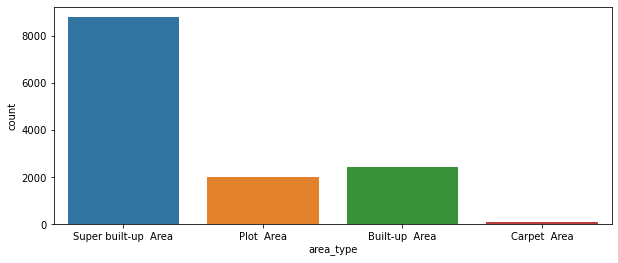

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x = bhd.area_type, data = bhd)
plt.show()

In [14]:
bhd.availability.value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
15-Aug               1
17-Jan               1
16-Oct               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [15]:
def check_avail(l):
    if l == 'Ready To Move':
        return 1
    else: 
        return 0

In [16]:
bhd['availability'] = bhd['availability'].apply(check_avail)

In [17]:
bhd.rename(columns= {'availability':'avail_now'}, inplace = True)


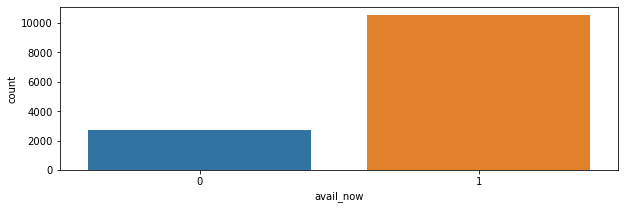

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(x = bhd.avail_now, data = bhd)
plt.show()

In [19]:
bhd.location.value_counts()

Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Off Bannergatta Road      1
Malimakanapura            1
Mukkutam Nagar            1
Nrupathunga Nagar         1
T c palya                 1
Name: location, Length: 1305, dtype: int64

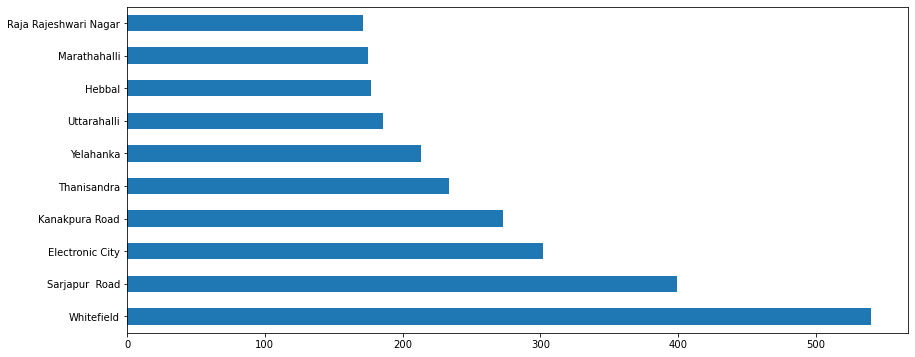

In [20]:
bhd.location.value_counts()[:10].plot(kind='barh',figsize=(14,6))
plt.show()

In [21]:
bhd['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
16 BHK           1
27 BHK           1
14 BHK           1
13 BHK           1
19 BHK           1
18 Bedroom       1
12 Bedroom       1
43 Bedroom       1
Name: size, dtype: int64

In [22]:
bhd['size'] = bhd['size'].apply(lambda a: str(a).split(' ')[0])

bhd['size'] = bhd['size'].apply(lambda x:3 if(x =='nan') else x)

bhd['size'] = bhd['size'].map(int)

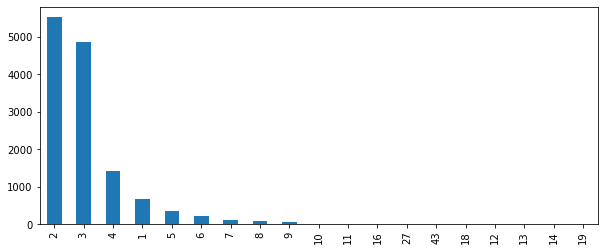

In [23]:
bhd['size'].value_counts().plot(kind= 'bar',figsize=(10,4))
plt.show()

In [24]:
bhd.rename(columns= {'size':'size_bhk'}, inplace = True)

In [25]:
bhd['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
VKvenas     1
SontsAp     1
Hincy R     1
Swers T     1
Suriaa      1
Name: society, Length: 2688, dtype: int64

In [26]:
bhd['society'].isna().sum()

5502

In [27]:
bhd.drop(['society'],axis=1,inplace=True)

In [28]:
bhd.total_sqft.value_counts()


1200           843
1100           221
1500           205
2400           196
600            180
              ... 
4303             1
1140 - 1250      1
4201             1
1234.6           1
581              1
Name: total_sqft, Length: 2117, dtype: int64

In [29]:
def oton(k):
    num = k.split('-')
    q=0
    for t in num:
        try :
            q+=float(t)
            return q/len(num)
        except ValueError as v:
            return num

In [30]:
bhd['total_sqft']=bhd['total_sqft'].apply(oton)

In [31]:
# assigning sqft value to corresponding house sizes in bhk
size = bhd['size_bhk'].value_counts().index
size = [i for i in size]
sqft = []
for z in size:
    
    y=bhd[bhd['size_bhk']==z]['total_sqft']
    sum = 0
    count=0
    for i in y:
        if(type(i) == float):
            sum+=i
            count+=1
        else :
            continue
    sqft.append(sum/count)    

In [32]:
def fitk(v):
    c1 = v[0]
    c2 = v[1]
    if type(c2) != float:
        return sqft[size.index(c1)]
    else :
        return c2

In [33]:
bhd['total_sqft'] = bhd[['size_bhk','total_sqft']].apply(fitk,axis=1)


C:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


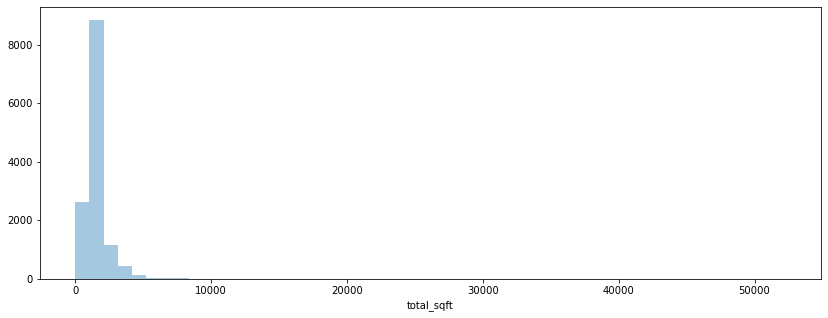

In [34]:
plt.figure(figsize=(14,5))
sns.distplot(bhd['total_sqft'],kde = False)
plt.show()

In [35]:
bhd.drop(bhd[bhd['total_sqft'] < 300].index,inplace=True)

In [36]:
bhd.total_sqft.std()

1232.2194374025964

In [37]:
bhd.total_sqft.mean()

1546.8349570228913

In [38]:
bhd.drop(bhd[bhd['total_sqft'] > 10000].index,inplace=True)


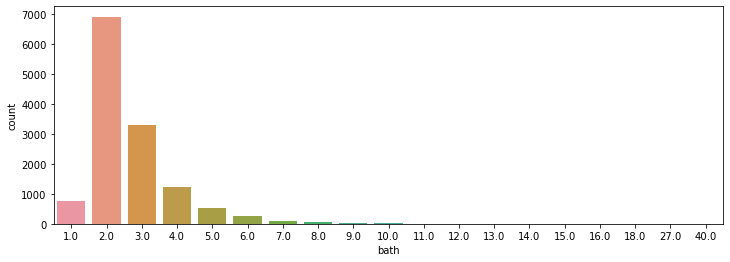

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(x='bath',data=bhd)
plt.show()


In [40]:
bhd.bath.isna().sum()

73

In [41]:
bhd.balcony.isna().sum()

604

In [42]:
bhd.dropna(axis=0,how='any',inplace=True)

In [43]:
# converting to int datatype 
bhd['bath']=bhd['bath'].map(int)
bhd['balcony']=bhd['balcony'].map(int)


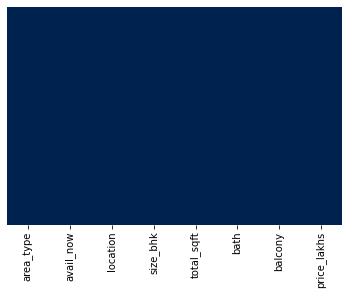

In [44]:
sns.heatmap(data=bhd.isna(),yticklabels=False,cbar = False,cmap='cividis')
plt.show()

In [45]:
bhd.duplicated().sum()

653

In [46]:
bhd.drop_duplicates(inplace=True)

In [47]:
bhd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12013 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_type    12013 non-null  object 
 1   avail_now    12013 non-null  int64  
 2   location     12013 non-null  object 
 3   size_bhk     12013 non-null  int64  
 4   total_sqft   12013 non-null  float64
 5   bath         12013 non-null  int64  
 6   balcony      12013 non-null  int64  
 7   price_lakhs  12013 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 844.7+ KB


In [48]:
bhd.head()

,area_type,avail_now,location,size_bhk,total_sqft,bath,balcony,price_lakhs
0,Super built-up Area,0,Electronic City Phase II,2,1056.0,2,1,39.07
1,Plot Area,1,Chikka Tirupathi,4,2600.0,5,3,120.00
2,Built-up Area,1,Uttarahalli,3,1440.0,2,3,62.00
3,Super built-up Area,1,Lingadheeranahalli,3,1521.0,3,1,95.00
4,Super built-up Area,1,Kothanur,2,1200.0,2,1,51.00


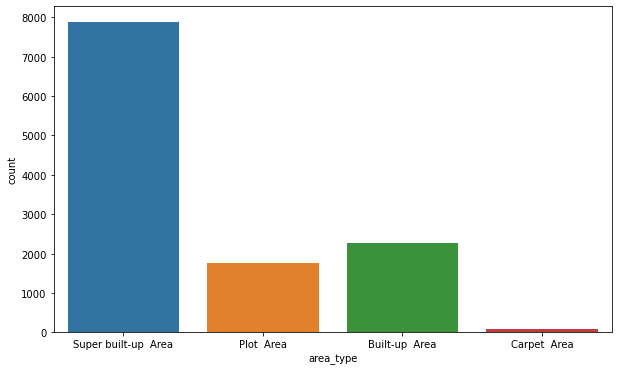

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='area_type',data=bhd)
# plt.legend(loc =1)
plt.show()

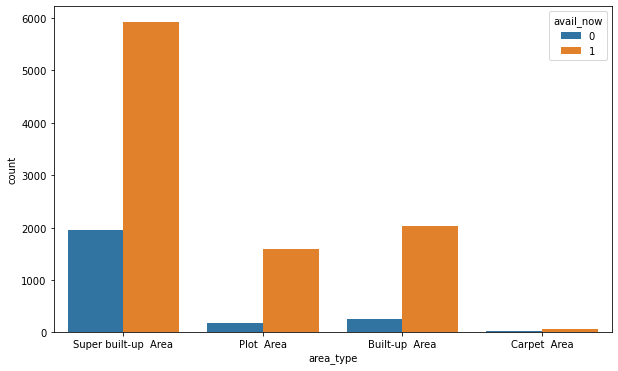

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x='area_type',data=bhd,hue='avail_now')
# plt.legend(loc =1)
plt.show()

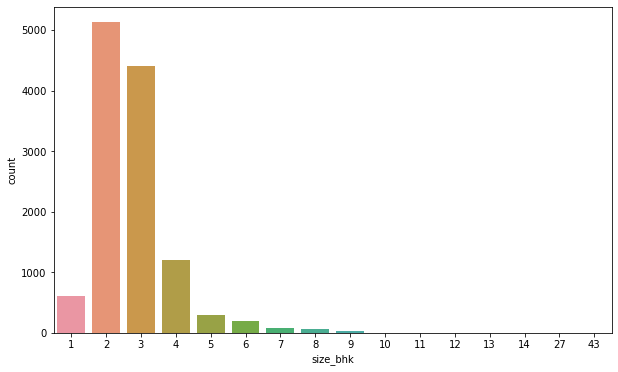

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='size_bhk',data=bhd)
# plt.legend(loc =1)
plt.show()

C:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


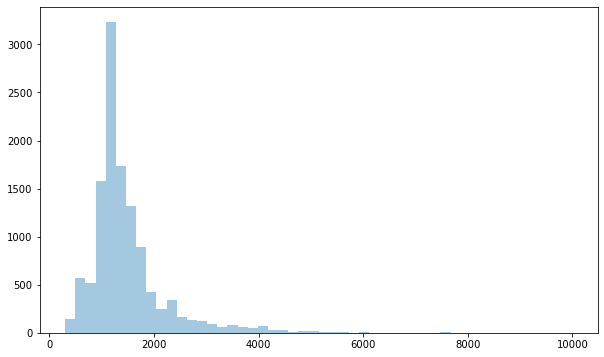

In [52]:
plt.figure(figsize=(10,6))
sns.distplot(x=bhd['total_sqft'],kde=False)
plt.show()

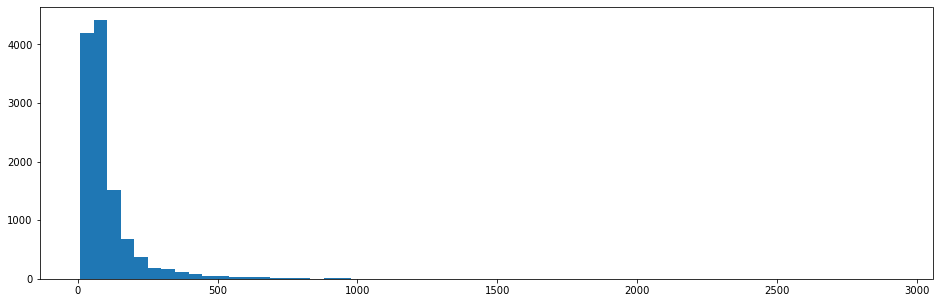

In [53]:
y = bhd.price_lakhs.value_counts()
plt.figure(figsize=(16,5))
plt.hist(x=y.index,weights=y,bins=60)
plt.show()

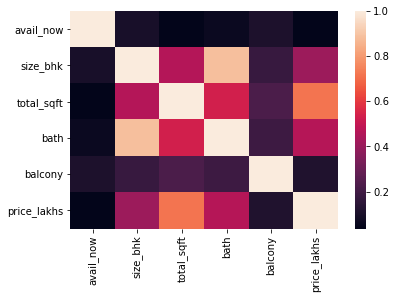

In [54]:
sns.heatmap(bhd.corr())
plt.show()


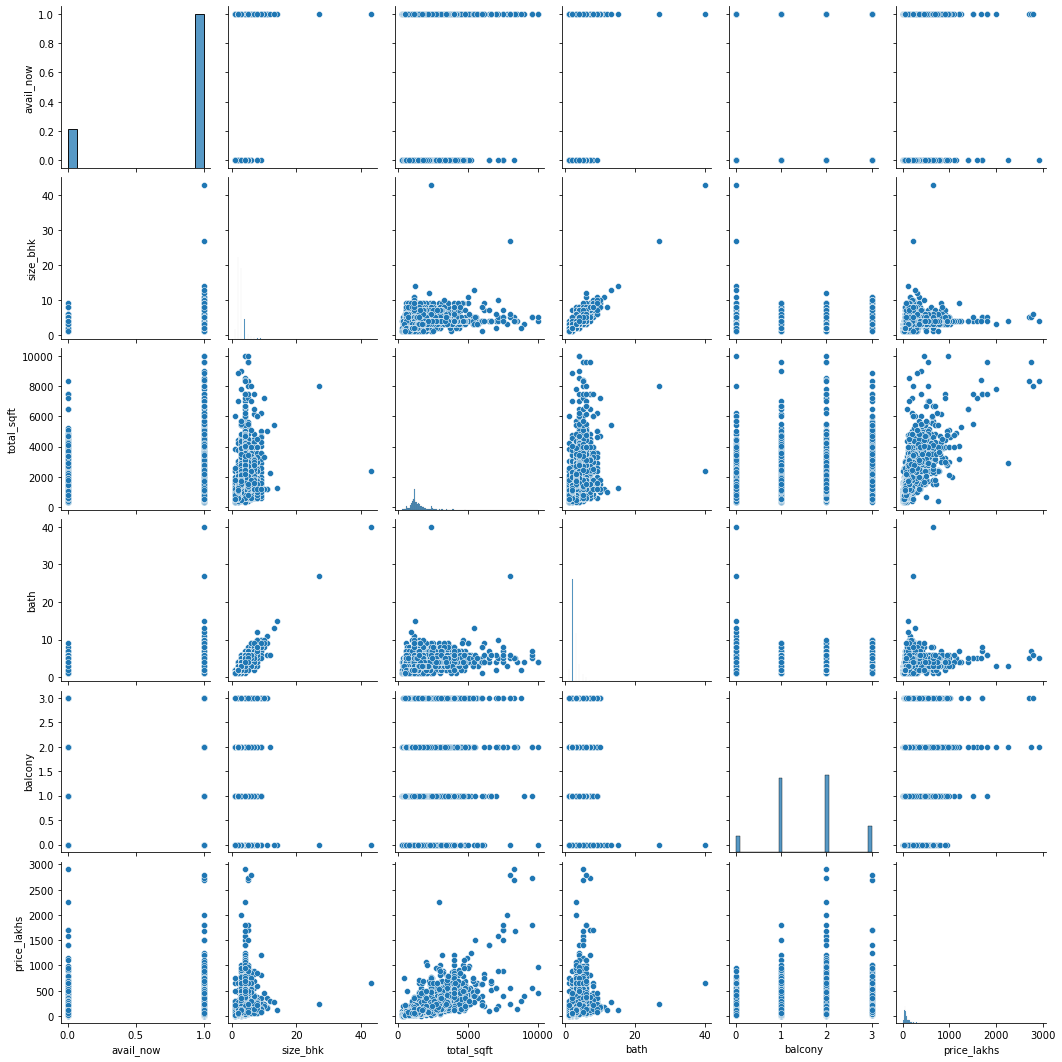

In [55]:
sns.pairplot(data=bhd)

In [56]:
bhd.drop(['location'],axis=1,inplace=True)

In [57]:
bhd['ppsft'] = (bhd['price_lakhs']*100000)/bhd['total_sqft']

In [58]:
bhd.corr()

,avail_now,size_bhk,total_sqft,bath,balcony,price_lakhs,ppsft
avail_now,1.000000,0.097407,0.037297,0.065419,0.109787,0.036362,0.061832
size_bhk,0.097407,1.000000,0.464811,0.888568,0.176744,0.409809,0.370785
total_sqft,0.037297,0.464811,1.000000,0.535564,0.227131,0.719163,0.207596
bath,0.065419,0.888568,0.535564,1.000000,0.194022,0.466404,0.378742
balcony,0.109787,0.176744,0.227131,0.194022,1.000000,0.115881,-0.000272
price_lakhs,0.036362,0.409809,0.719163,0.466404,0.115881,1.000000,0.671933
ppsft,0.061832,0.370785,0.207596,0.378742,-0.000272,0.671933,1.000000


In [59]:
bhd.describe()

,avail_now,size_bhk,total_sqft,bath,balcony,price_lakhs,ppsft
count,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000
mean,0.800466,2.752851,1487.031197,2.634313,1.585949,106.943508,6701.561653
std,0.399667,1.220155,790.777188,1.240030,0.822516,126.632728,4440.609200
min,0.000000,1.000000,300.000000,1.000000,0.000000,9.000000,500.000000
25%,1.000000,2.000000,1095.000000,2.000000,1.000000,50.000000,4286.569718
50%,1.000000,3.000000,1265.000000,2.000000,2.000000,70.000000,5478.260870
75%,1.000000,3.000000,1650.000000,3.000000,2.000000,116.000000,7371.794872
max,1.000000,43.000000,10000.000000,40.000000,3.000000,2912.000000,176470.588235


In [60]:
bhd.drop(bhd[bhd['bath'] > 10].index,inplace=True)


<AxesSubplot:>

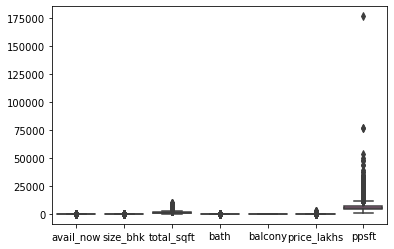

In [61]:
sns.boxplot(data=bhd)

In [62]:
bhdn = pd.get_dummies(bhd,drop_first=True)

In [63]:
y = bhdn[['price_lakhs']]

X = bhdn.drop(['price_lakhs'],axis=1)

In [64]:
bhdn.head()

,avail_now,size_bhk,total_sqft,bath,balcony,price_lakhs,ppsft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,2,1056.0,2,1,39.07,3699.810606,0,0,1
1,1,4,2600.0,5,3,120.00,4615.384615,0,1,0
2,1,3,1440.0,2,3,62.00,4305.555556,0,0,0
3,1,3,1521.0,3,1,95.00,6245.890861,0,0,1
4,1,2,1200.0,2,1,51.00,4250.000000,0,0,1


In [65]:
X.head()

,avail_now,size_bhk,total_sqft,bath,balcony,ppsft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,2,1056.0,2,1,3699.810606,0,0,1
1,1,4,2600.0,5,3,4615.384615,0,1,0
2,1,3,1440.0,2,3,4305.555556,0,0,0
3,1,3,1521.0,3,1,6245.890861,0,0,1
4,1,2,1200.0,2,1,4250.000000,0,0,1


In [66]:
y.head()

,price_lakhs
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [69]:
Lr = LinearRegression()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)


In [71]:
Lr.fit(X_train,y_train)

LinearRegression()

In [72]:
Lr.score(X_train,y_train)

0.8018705721204622

In [73]:
Lr.score(X_test,y_test)

0.8416068817902732

In [74]:
y_hat = Lr.predict(X_test)

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,y_hat)

0.8416068817902732

In [77]:
cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=10)
ar = cross_val_score(LinearRegression(), X, y, cv=cv)


In [78]:
ar

array([0.79326666, 0.86703231, 0.84071631, 0.67202991, 0.83617029,
       0.86448117])

In [79]:
print(f"This model can explain nearly {round(ar.mean()*100,2)}% of the results.")

This model can explain nearly 81.23% of the results.
